In [379]:
#importing libs
import numpy as py 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [413]:
#loading the data
data = pd.read_csv('Medicalpremium.csv')

In [381]:
#looking at data size and characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [350]:
#getting a more comprehensive summary 
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Medical Insurance")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [382]:
#5 point summary numerical columns
data.describe()

Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies  \
count          986.000000  986.000000  986.000000      986.000000   
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000        0.000000   
25%              0.000000  161.000000   67.000000        0.000000   
50%              0.000000  168.000000   75.000000        0.000000   
75%              0.000000  176.000000   87.000000        0.000000   
max              1.000000  188.000000  132.000000        1.000000   

       HistoryOfCancerInFamily  NumberOfMajorSurgeries  PremiumPrice  
count               986.000000              986.000000    986.000000  
mean                  0.117647                0.667343  24336.713996  
std                   0.322353                0.749205   6248.184382  
min                   0.000000                0.000000  15000.000000  
25%                   0.000000                0.000000  21000.000000  
50%                   0.000000                1.000000  23000.000000  
75%                   0.000000                1.000000  28000.000000  
max                   1.000000                3.000000  40000.000000

In [383]:
#No Null values
#All the data is in an interger format
#We can start with univariate analyis

EDA

Univariate

In [384]:
#keeping the continuos variables togethe for ease of use in functions
data_num=data[['Age','Height','Weight','PremiumPrice']]

In [385]:
#keeping the categorical variables togethe for ease of use in functions
data_cat=data.drop(columns=['Age','Height','Weight'])

In [386]:
#udf for creating boxplot
def box_plotter(DF):
    for x in DF.columns:
        Title='Box_plot_for_'+x
        sns.boxplot(data=data,y=x).set_title(Title)
        plt.show()

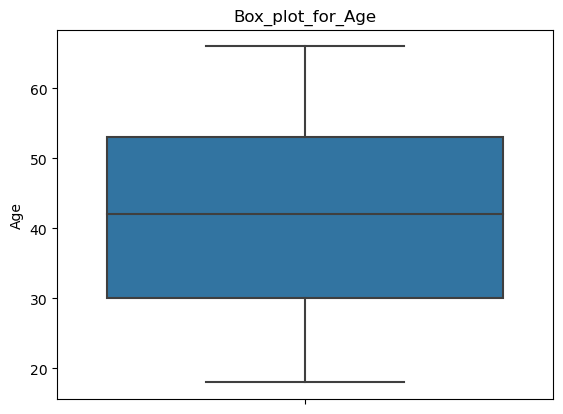

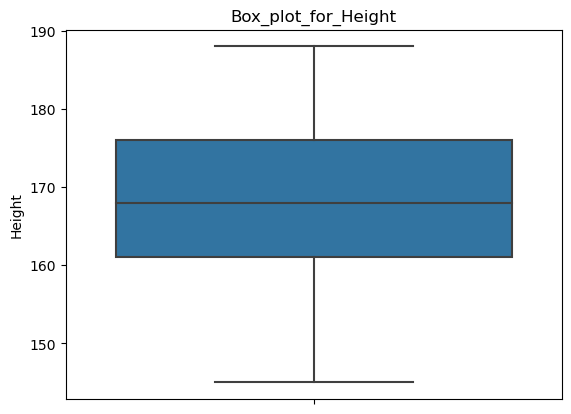

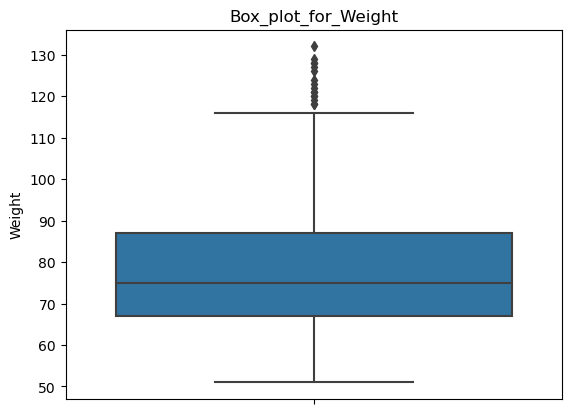

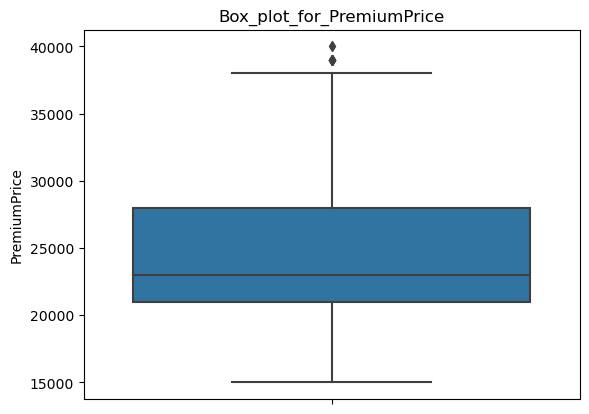

In [387]:
#box plots for continuos varibales
box_plotter(data_num)

In [388]:
#udf for creating countplots
def count_plotter(DF):
    for x in DF.columns:
        Title='Count_plot_for_'+x
        sns.countplot(data=data,y=x).set_title(Title)
        plt.show()

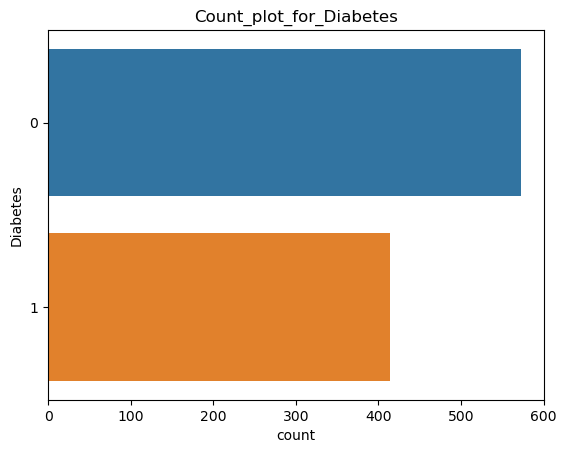

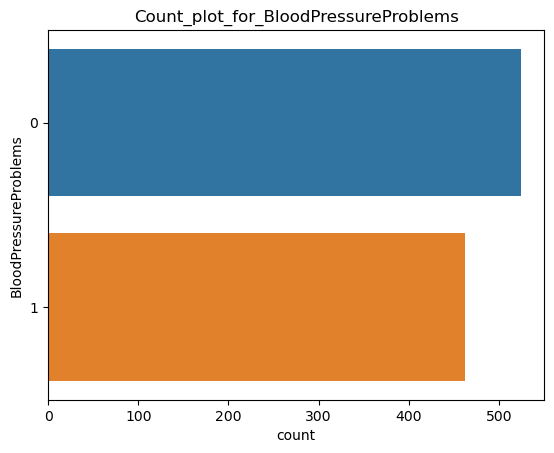

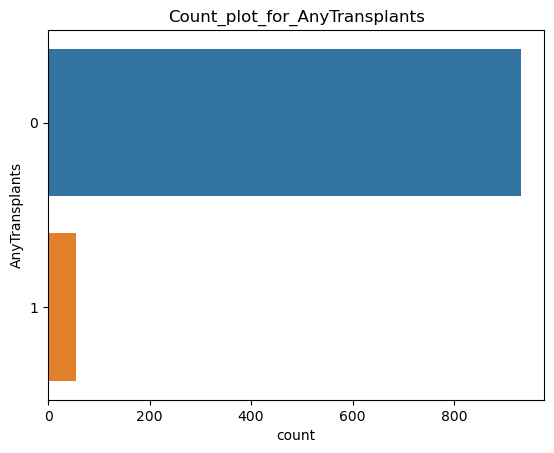

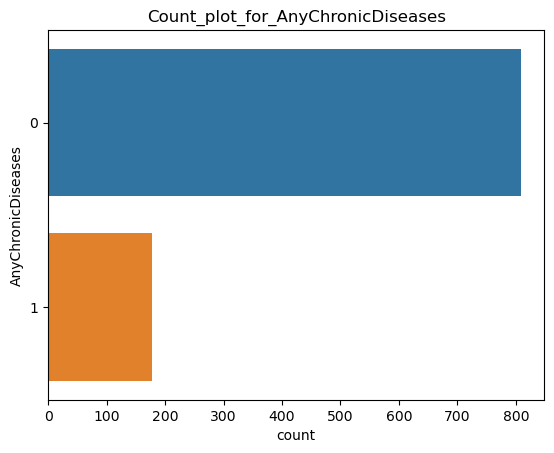

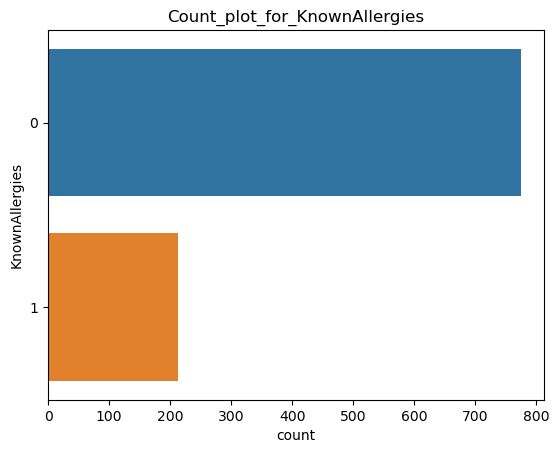

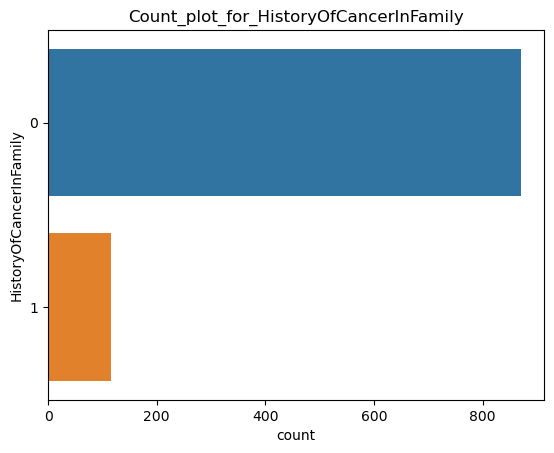

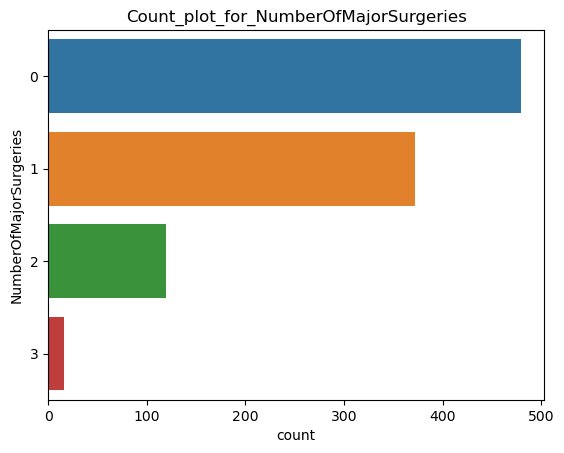

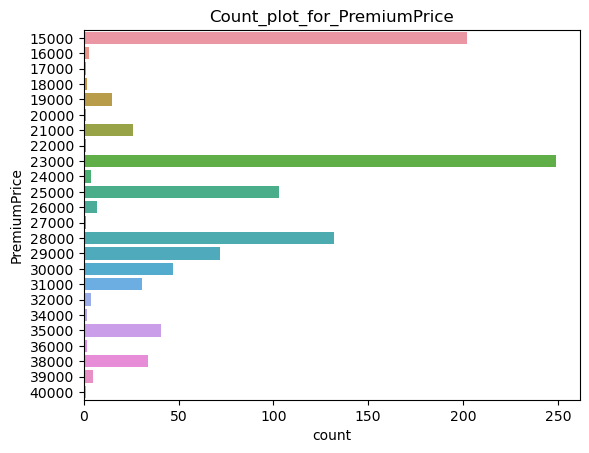

In [389]:
#plotting the count plots
count_plotter(data_cat)

Bivariate

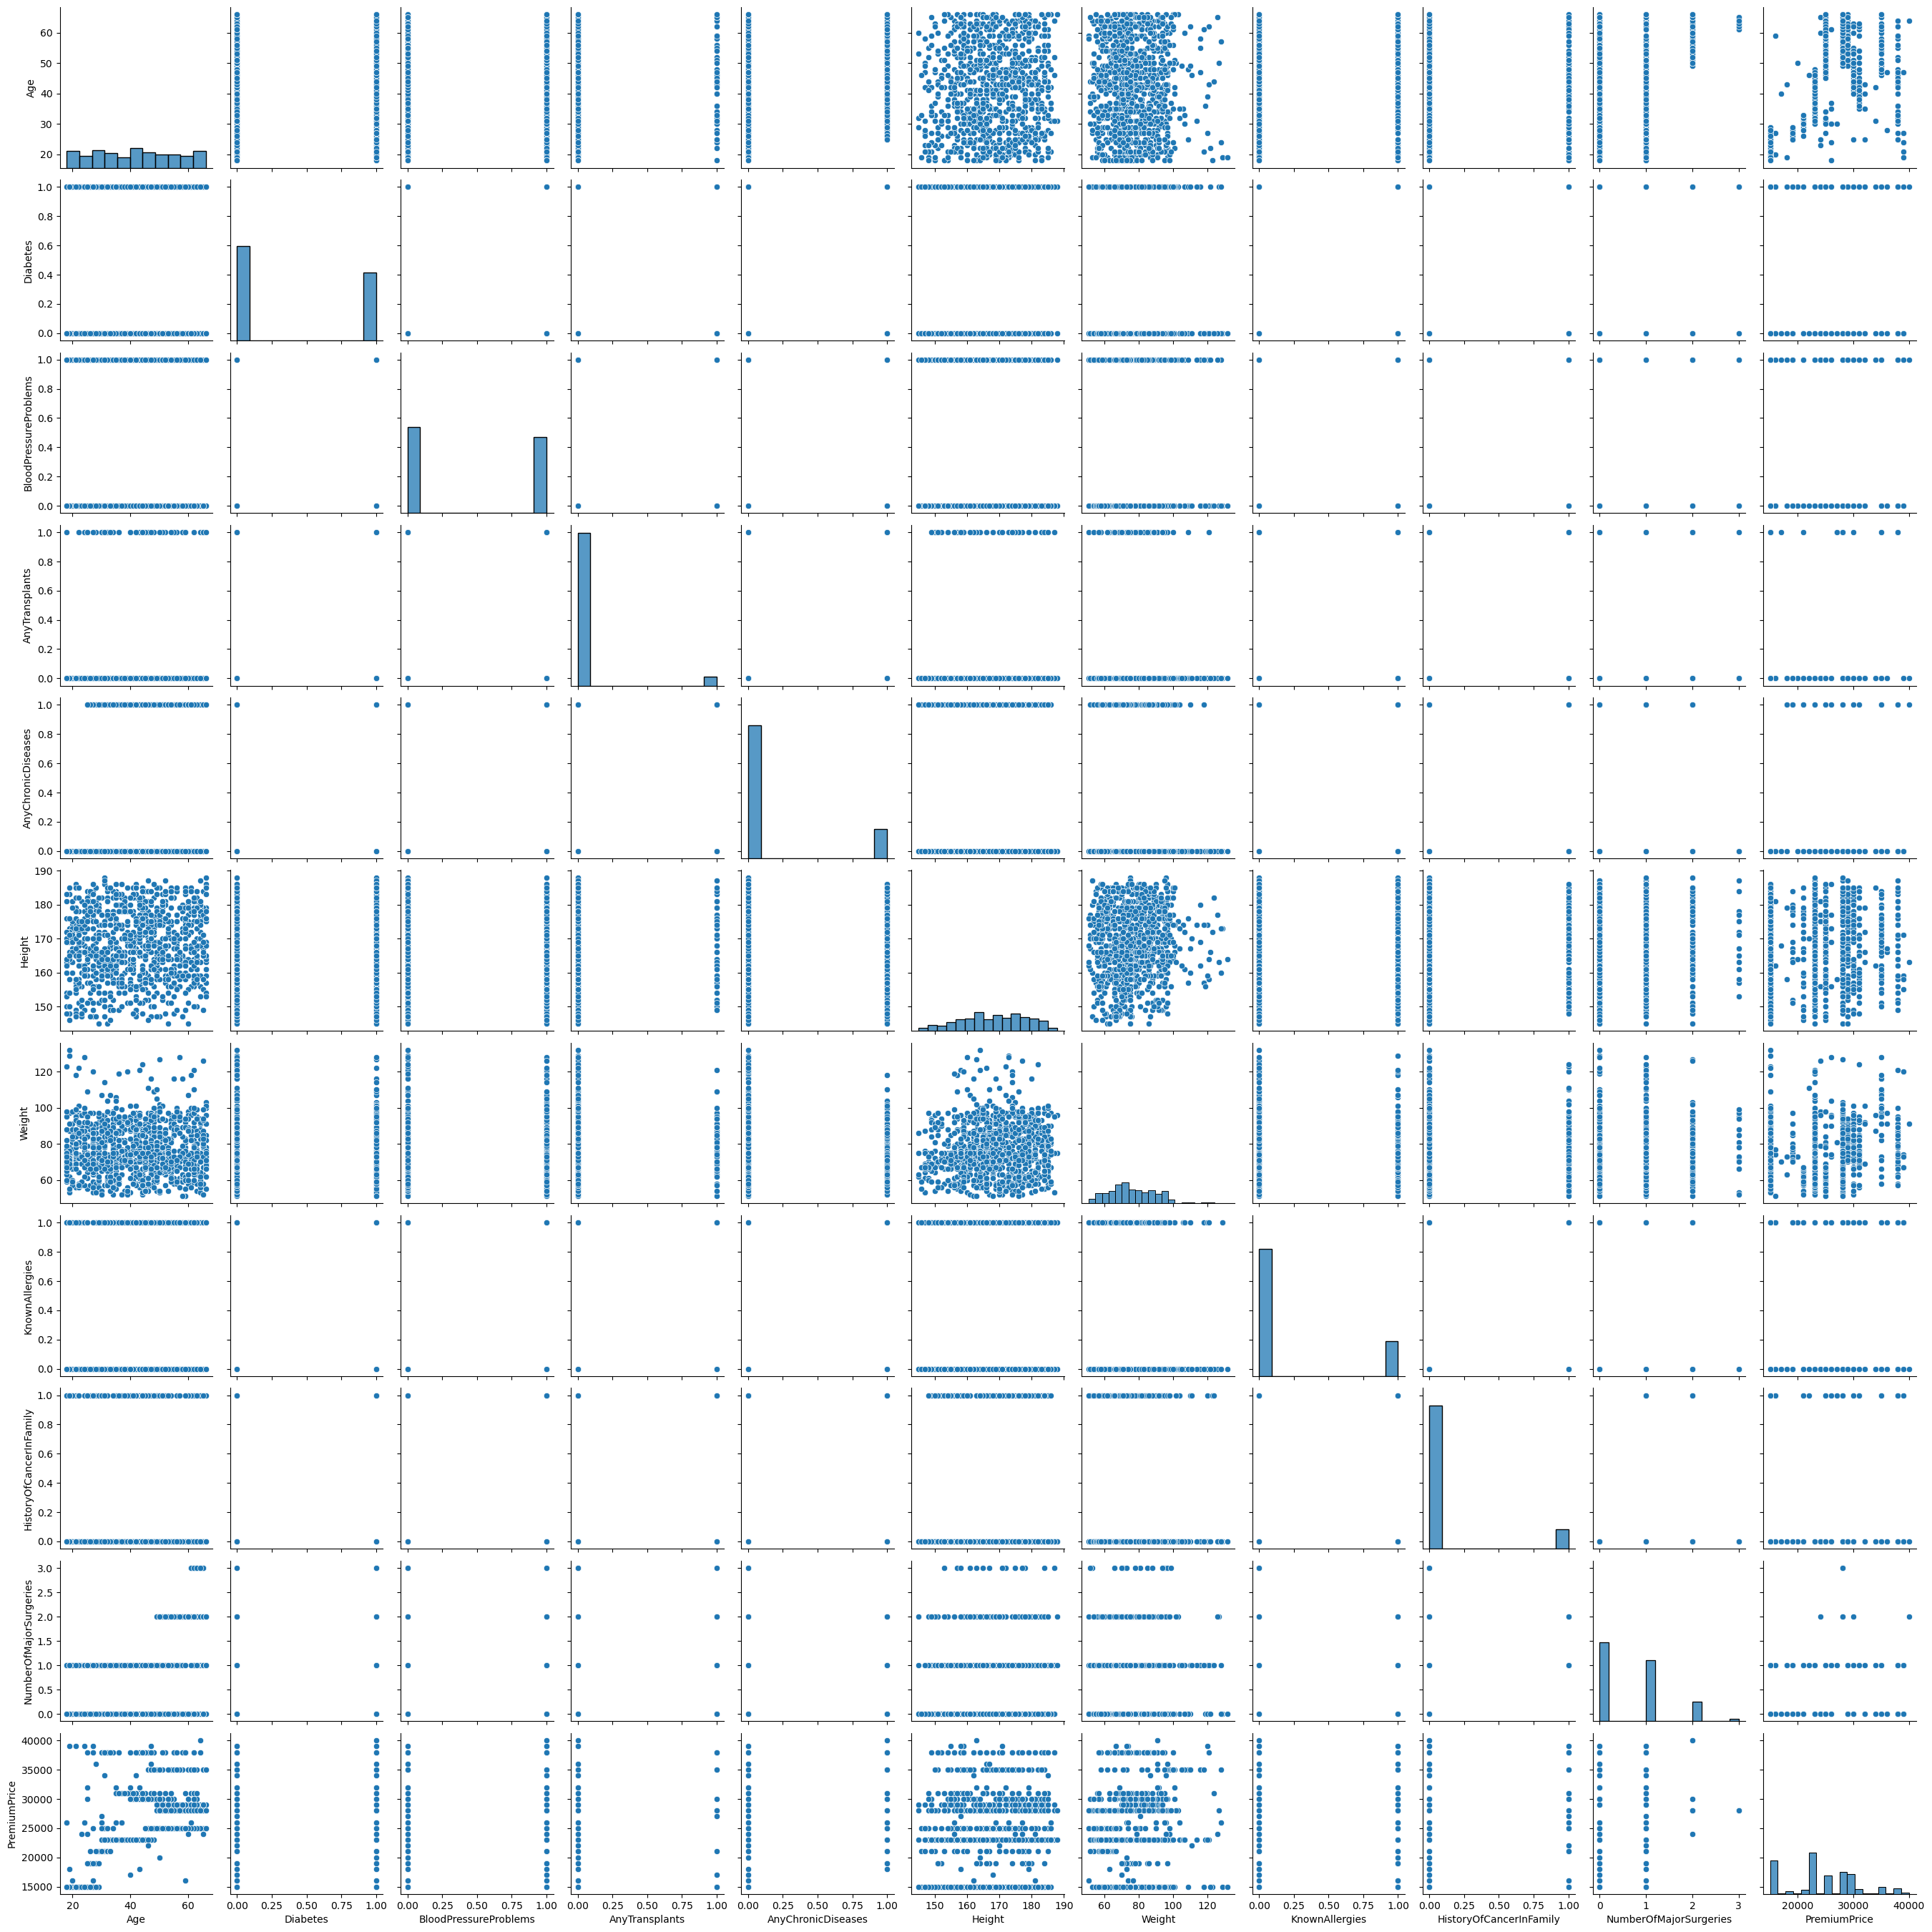

In [313]:
#plotting a pairplot
sns.pairplot(data)

In [390]:
#function for checking the sum,mean,count and std of medical premimums across categories
def stat_checker(DF,Mean):
    li=DF.columns.tolist()
    x=len(DF.columns)
    lix=li[:x-1]
    for y in lix:
        print(DF.groupby([y])[Mean].aggregate(['sum','count','mean','std']).round(2))
        print('-------------------------------------')

In [391]:
#average premimum prices vs categories
stat_checker(data_cat,'PremiumPrice')

               sum  count      mean      std
Diabetes                                    
0         13689000    572  23931.82  6562.96
1         10307000    414  24896.14  5746.15
-------------------------------------
                            sum  count      mean      std
BloodPressureProblems                                    
0                      12239000    524  23356.87  6605.85
1                      11757000    462  25448.05  5619.58
-------------------------------------
                     sum  count      mean      std
AnyTransplants                                    
0               22249000    931  23897.96  5741.50
1                1747000     55  31763.64  9213.44
-------------------------------------
                         sum  count      mean      std
AnyChronicDiseases                                    
0                   19170000    808  23725.25  6322.11
1                    4826000    178  27112.36  5056.60
-------------------------------------
            

In [392]:
#creating a function for binning the continuos variables
def num_binner(df,column_name):
    ma=df[column_name].max()
    mi=df[column_name].min()
    num_classes=round(1+3.3*(py.log10(len(df[column_name]))))
    width=(ma-mi)/num_classes
    bins_=[]
    labels_=[]
    for x in range(num_classes):
        step=mi+x*width
        bins_.append(int(step))
        labels_.append(x)
    bins_.append(ma)
    new_name=df[column_name].name+'_'+'Binned'
    df[new_name]=pd.cut(x=df[column_name] , bins=bins_ , labels=labels_ , include_lowest = True)

In [393]:
#checking the binned data
num_binner(data,'Age')
num_binner(data,'Height')
num_binner(data,'Weight')

In [394]:
#creating a new frame for better analysis
data_binned=data[['Age_Binned','Weight_Binned','Height_Binned','PremiumPrice']]

In [395]:
#checking the stats for binned data with reference to premium prices
stat_checker(data_binned,'PremiumPrice')

                sum  count      mean      std
Age_Binned                                   
0           1589000    101  15732.67  3673.94
1           1222000     72  16972.22  4992.87
2           2159000    108  19990.74  6222.50
3           2116000     89  23775.28  3857.56
4           1576000     65  24246.15  3405.10
5           3100000    118  26271.19  4700.72
6           2500000     94  26595.74  4711.73
7           2335000     82  28475.61  3051.92
8           2347000     81  28975.31  3033.05
9           2094000     74  28297.30  3617.80
10          2958000    102  29000.00  3368.46
-------------------------------------
                   sum  count      mean      std
Weight_Binned                                   
0              2149000     93  23107.53  5195.03
1              2656000    114  23298.25  5069.31
2              5720000    236  24237.29  6168.11
3              4251000    180  23616.67  6062.32
4              3230000    131  24656.49  6400.45
5              339400

Text(0.5, 1.0, 'Sum of PremiumPrice Vs Age')

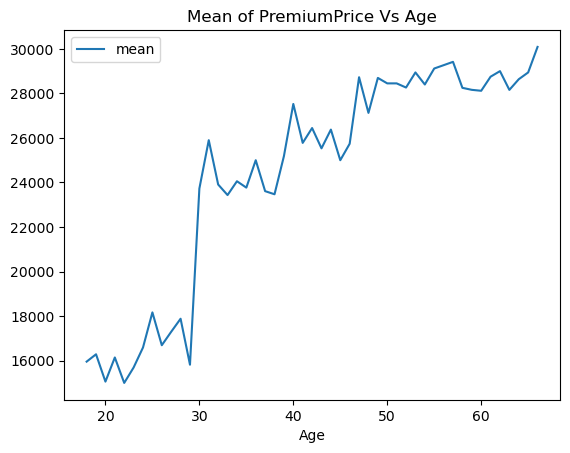

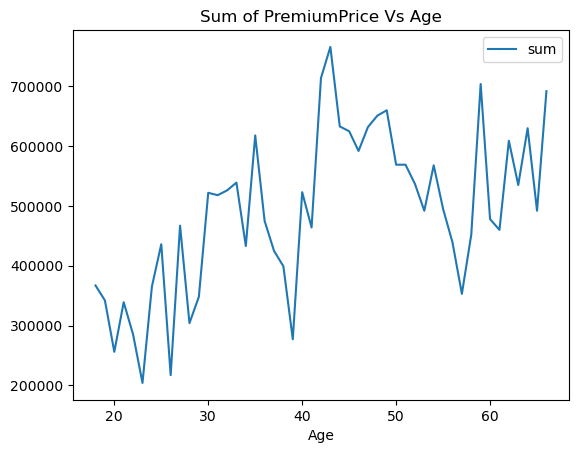

In [396]:
#Plot checking the relationship between age and mean of premium prices
data.groupby(['Age'])['PremiumPrice'].aggregate(['mean']).plot().set_title('Mean of PremiumPrice Vs Age')
data.groupby(['Age'])['PremiumPrice'].aggregate(['sum']).plot().set_title('Sum of PremiumPrice Vs Age')

In [397]:
#function for plotting relationship between premimum prices and other variables
def stat_plotter_mean(DF,Parameter):
    li=DF.columns.tolist()
    x=len(DF.columns)
    lix=li[:x-1] 
    for y in lix:
        title='Mean of Premium Price Vs '+y
        DF.groupby([y])[Parameter].aggregate(['mean']).round(2).plot().set_title(title)

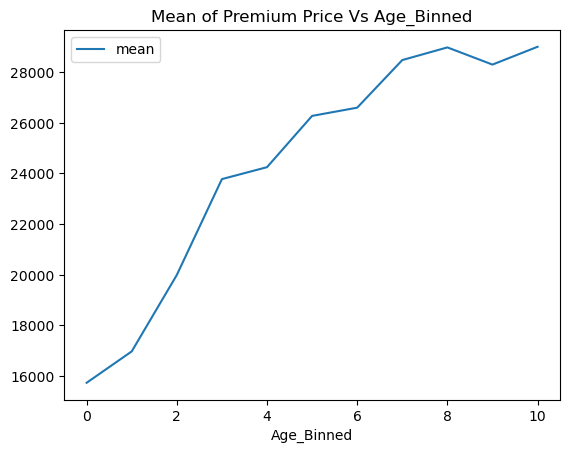

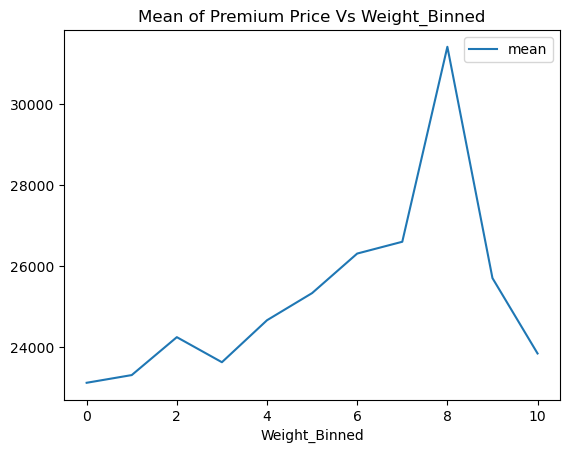

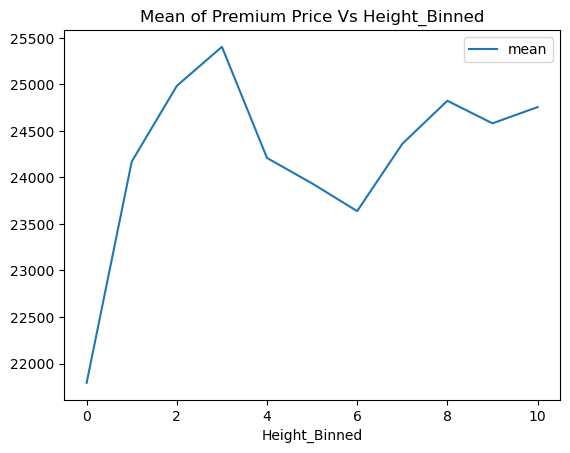

In [398]:
stat_plotter_mean(data_binned,'PremiumPrice')

Feature Engineering

In [414]:
#creating a new feature BMI
data['BMI']=(data['Weight']/((data['Height']/100)**2)).round(2)

<Axes: >

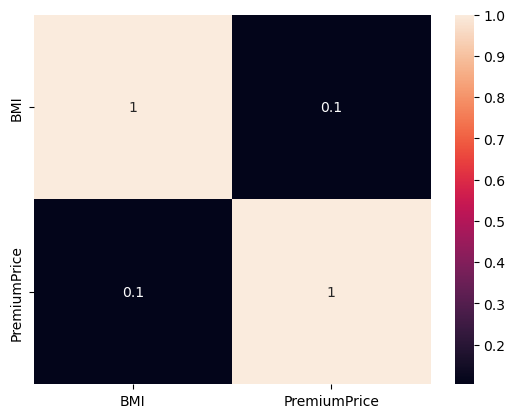

In [406]:
#chechking correlation with the feature
sns.heatmap(data[['BMI','PremiumPrice']].corr(),annot=True)

Text(0.5, 1.0, 'BMI vs PremiumPrice')

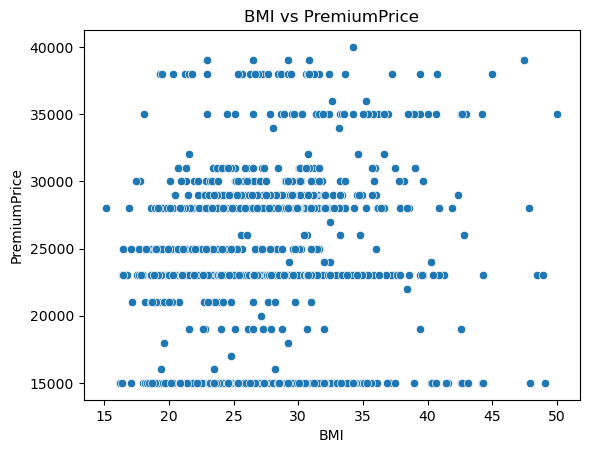

In [325]:
#chechking correlation with the feature
sns.scatterplot(data=data,x='BMI',y='PremiumPrice').set_title('BMI vs PremiumPrice')

In [326]:
#Binning BMI
num_binner(data,'BMI')

Text(0.5, 1.0, 'Mean_PremPrice vs BMI_Bined')

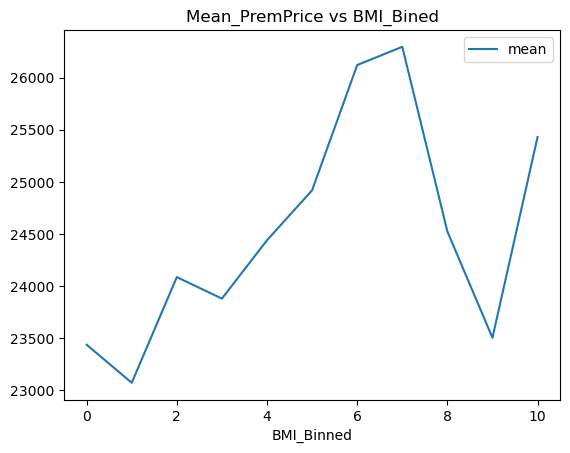

In [327]:
#diving deeper
data.groupby(['BMI_Binned'])['PremiumPrice'].aggregate(['mean']).round(2).plot().set_title('Mean_PremPrice vs BMI_Bined') 

In [415]:
#variables that reflect health given their age
data['Diab/Age']=data['Diabetes']/data['Age']
data['Num_Chronic_Dis/Age']=data['AnyChronicDiseases']/data['Age']
data['Transplants/Age']=data['AnyTransplants']/data['Age']

<Axes: >

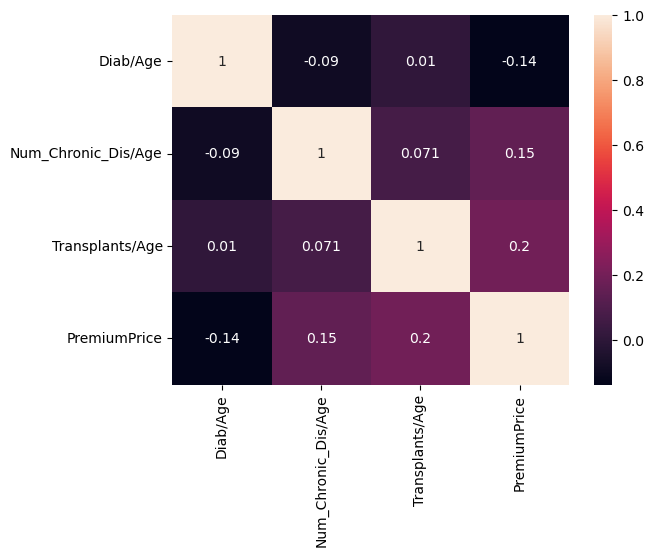

In [329]:
#chechking correlation with the feature
sns.heatmap(data[['Diab/Age','Num_Chronic_Dis/Age','Transplants/Age','PremiumPrice']].corr(),annot=True)

Model Creation

In [330]:
#dropping binned columns
data.drop(columns=['BMI_Binned','Age_Binned','Height_Binned','Weight_Binned'],inplace=True)

<Axes: >

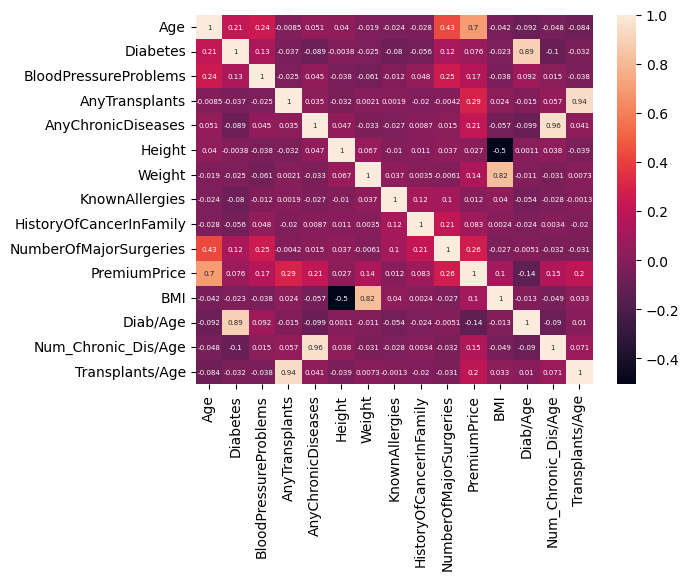

In [331]:
#chcecking the correlation scores
sns.heatmap(data.corr(),annot=True,annot_kws={"size": 20 / py.sqrt(len(data.corr()))})

In [332]:
#removing outlier function
def outlier_remover(df,column_name):
    q1=df[column_name].quantile(.25)
    q3=df[column_name].quantile(.75)
    IQR=q3-q1
    Upper_Bound=q3+1.5*IQR
    Lower_Bound=q1-1.5*IQR
    z=df[column_name].mode()[0]
    df[column_name]=df[column_name].apply(lambda x: z if x >= Upper_Bound or x <= Lower_Bound else x)

In [416]:
#removing outlier from weight
outlier_remover(data,'Weight')

In [440]:
#dropping highly correlated variables
data.drop(columns=['Diabetes','AnyTransplants','AnyChronicDiseases','Weight','Height'],inplace=True)

In [441]:
#creating independent variable set and dependent variable set
X=data.drop(columns=['PremiumPrice'])
y=data['PremiumPrice']

In [461]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_Scaled=sc.fit_transform(X)

In [468]:
#splitting the data into training and testing set 
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size=0.25,random_state=0)

In [469]:
#testing the model 
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
models =\
{LinearRegression():'Linear Regression',
Lasso():'Lasso',
Ridge():'Ridge',
XGBRFRegressor():'XGBRFRegressor',
RandomForestRegressor():'RandomForest'}

for m in models.keys():
    m.fit(X_train,y_train)

In [470]:
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",(model.score(X_test,y_test)).round(2)*100,"%")

Accuracy Score for Linear Regression is :  53.0 %
Accuracy Score for Lasso is :  53.0 %
Accuracy Score for Ridge is :  53.0 %
Accuracy Score for XGBRFRegressor is :  59.0 %
Accuracy Score for RandomForest is :  60.0 %


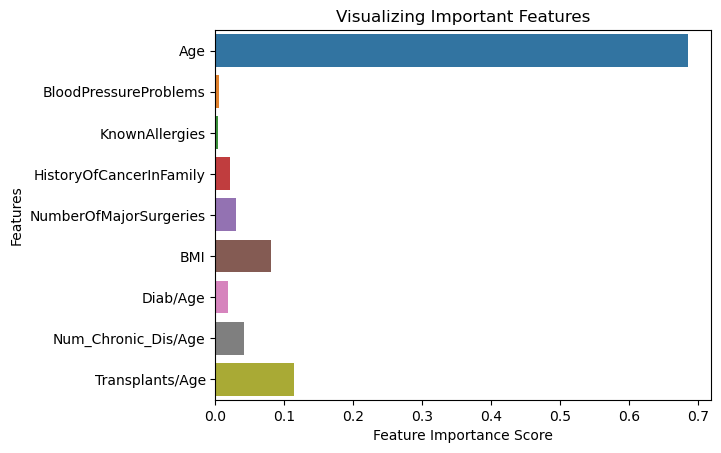

In [457]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
#feature importance under random forest
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

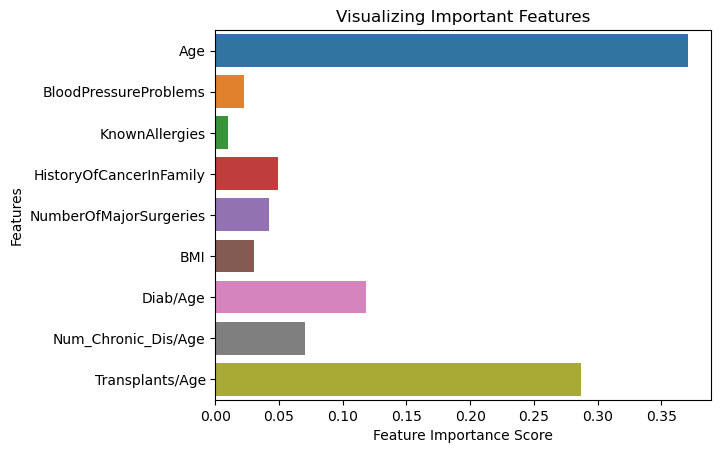

In [448]:
xgboost =XGBRFRegressor()
xgboost.fit(X_train,y_train)
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

Through PCA

In [449]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_Scaled)

PCA()

In [450]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[18.72236932 13.07505327 12.33000604 11.57311343 11.15608984  9.99765129
  9.59614906  8.08653277  5.46303499]



In [451]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 18.72236932  31.79742259  44.12742863  55.70054206  66.85663189
  76.85428318  86.45043224  94.53696501 100.        ]



Text(0, 0.5, 'Explained variance (%)')

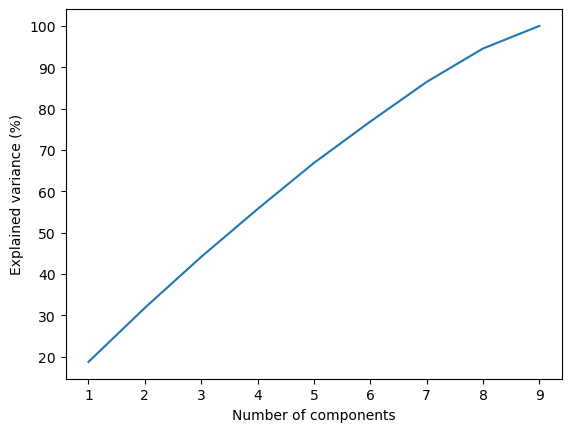

In [452]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         py.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [453]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LinearRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('linearregressor', _model)
])

In [454]:
from sklearn.model_selection import train_test_split
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=0)

In [455]:
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('linearregressor', LinearRegression())])

In [456]:
#checking model accuracy
log_regress_model.score(X_test,y_test)

0.4798711535674508